In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


file_path = 'OKCupid_profiles.csv'
data = pd.read_csv(file_path)
file_path = 'OKCupid_profiles.csv'
okc_data = pd.read_csv(file_path)


data.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   36         average       mostly other     often  sometimes   
2   37            thin           anything  socially        NaN   
3   22            thin         vegetarian  socially        NaN   
4   30        athletic                NaN  socially      never   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white    75.0      -1   
1              working on space camp                white    70.0   80000   
2     graduated from masters program                  NaN    68.0      -1   
3      working on college/university                white    71.0   20000   
4  graduated from college/university  asian, black, other    66.0      -1   

                           job                                     offspring  \
0               transportation  doesn&rsquo;t have kids, but might want them   
1         hospitality / travel  doesn&rsquo;t have kids, but might want them   
2                          NaN                                           NaN   
3                      student                       doesn&rsquo;t want kids   
4  artistic / musical / writer                                           NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   
3    straight                 likes cats   
4    straight  likes dogs and likes cats   

                                   religion sex  \
0     agnosticism and very serious about it   m   
1  agnosticism but not too serious about it   m   
2                                       NaN   m   
3                                       NaN   m   
4                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single

In [2]:
# Drop unnecessary columns (those with 'Unnamed' in their names)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Verify the cleaned dataset
data.info()  # This will display the cleaned dataset's structure

data_copy = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status       59946 non-null  object 
dtypes: f

In [3]:
# Descriptive statistics for numerical columns
print(data_copy.describe())

# Descriptive statistics for categorical columns
categorical_cols = data_copy.select_dtypes(include=['object']).columns
print(data_copy[categorical_cols].nunique())


                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.335402     68.295281    20033.222534
std        9.490009      3.994803    97346.192104
min       17.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      111.000000     95.000000  1000000.000000
body_type        12
diet             18
drinks            6
drugs             3
education        32
ethnicity       217
job              21
offspring        15
orientation       3
pets             15
religion         45
sex               2
sign             48
smokes            5
speaks         7647
status            5
dtype: int64


In [4]:
# Missing value percentages
missing_data = data_copy.isnull().mean() * 100
print("Missing Values (%):\n", missing_data[missing_data > 0])


Missing Values (%):
 body_type     8.834618
diet         40.694959
drinks        4.979482
drugs        23.487806
education    11.056618
ethnicity     9.475194
height        0.005005
job          13.675641
offspring    59.321723
pets         33.231575
religion     33.740366
sign         18.443266
smokes        9.194942
speaks        0.083408
dtype: float64


In [5]:
# Impute missing values for categorical variables with mode
#for col in categorical_cols:
#    if data_copy[col].isnull().any():
#        data_copy.loc[:, col] = data_copy[col].fillna(data_copy[col].mode()[0])

# Impute missing numerical columns with the mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
#for col in numerical_cols:
#    if data_copy[col].isnull().any():
#        data_copy.loc[:, col] = data_copy[col].fillna(data_copy[col].mean())

# Missing categorical data is replaced with the mode (most frequent value)
# Missing numerical data is replaced with the mean to maintain data consistency

#print("Missing values after imputation:\n", data_copy.isnull().sum().sum())


In [6]:
# One-hot encoding for categorical columns
encoded_data = pd.get_dummies(data_copy, columns=categorical_cols, drop_first=True)




In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = data_copy.copy()
scaled_data[numerical_cols] = scaler.fit_transform(scaled_data[numerical_cols])


In [8]:
# Interaction Terms - Lifestyle Interactions

# Create interaction terms
scaled_data['diet_smokes_interaction'] = (
    data_copy['diet'].astype(str) + "_" + data_copy['smokes'].astype(str)
)

# Combine lifestyle habits into interaction terms
scaled_data['diet_drinks_interaction'] = (
    data_copy['diet'].fillna('unknown').astype(str) + "_" + data_copy['drinks'].fillna('unknown').astype(str)
)
scaled_data['diet_drugs_interaction'] = (
    data_copy['diet'].fillna('unknown').astype(str) + "_" + data_copy['drugs'].fillna('unknown').astype(str)
)
scaled_data['smokes_drinks_interaction'] = (
    data_copy['smokes'].fillna('unknown').astype(str) + "_" + data_copy['drinks'].fillna('unknown').astype(str)
)

In [9]:
# Interaction Terms - Demographic + Lifestyle Interactions

scaled_data['sex_smokes_interaction'] = (
    data_copy['sex'].fillna('unknown').astype(str) + "_" + data_copy['smokes'].fillna('unknown').astype(str)
)
scaled_data['age_drinks_interaction'] = (
    pd.cut(data_copy['age'], bins=[17, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '50+']).astype(str)
    + "_" + data_copy['drinks'].fillna('unknown').astype(str)
)
scaled_data['ethnicity_diet_interaction'] = (
    data_copy['ethnicity'].fillna('unknown').astype(str) + "_" + data['diet'].fillna('unknown').astype(str)
)


In [10]:
# Interaction Terms - Lifestyle Clusters

scaled_data['lifestyle_cluster'] = (
    data_copy['diet'].fillna('unknown').astype(str) + "_" +
    data_copy['drinks'].fillna('unknown').astype(str) + "_" +
    data_copy['smokes'].fillna('unknown').astype(str) + "_" +
    data_copy['drugs'].fillna('unknown').astype(str)
)

# Education and Occupation Interactions
scaled_data['education_job_interaction'] = (
    data_copy['education'].fillna('unknown').astype(str) + "_" + data_copy['job'].fillna('unknown').astype(str)
)

# Relationship Preferences

scaled_data['orientation_sex_interaction'] = (
    data_copy['orientation'].fillna('unknown').astype(str) + "_" + data_copy['sex'].fillna('unknown').astype(str)
)
scaled_data['status_orientation_interaction'] = (
    data_copy['status'].fillna('unknown').astype(str) + "_" + data_copy['orientation'].fillna('unknown').astype(str)
)

# Pets and Lifestyle Interactions

scaled_data['pets_drinks_interaction'] = (
    data_copy['pets'].fillna('unknown').astype(str) + "_" + data_copy['drinks'].fillna('unknown').astype(str)
)
scaled_data['pets_smokes_interaction'] = (
    data_copy['pets'].fillna('unknown').astype(str) + "_" + data_copy['smokes'].fillna('unknown').astype(str)
)


In [11]:
# Ensure no missing values remain
print("Remaining missing values:\n", scaled_data.isnull().sum().sum())


Remaining missing values:
 159591


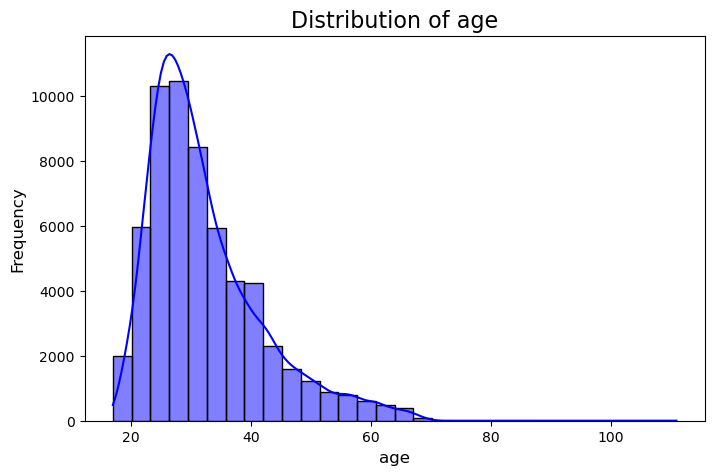

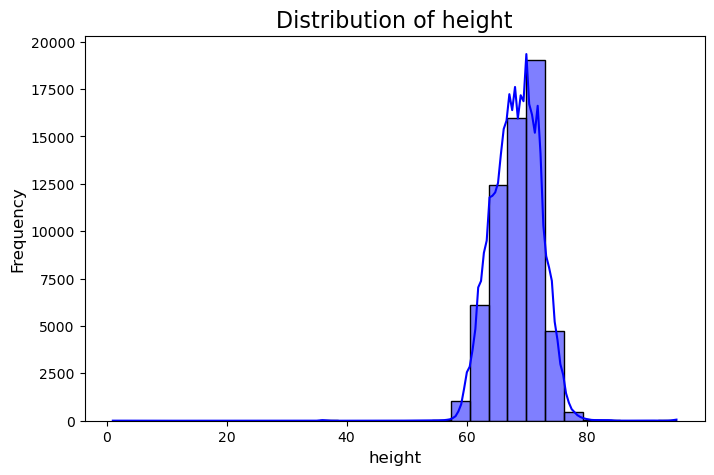

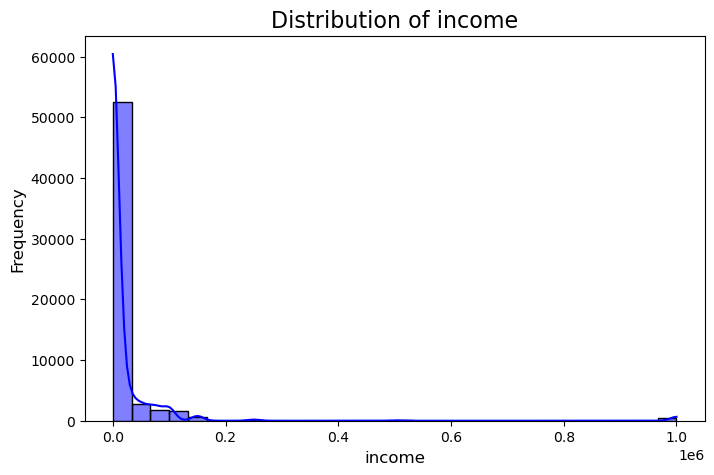

In [12]:
# Univariate Analysis - Numerical Variables
numerical_cols = ['age', 'height', 'income']

# Plot distributions for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_copy[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()


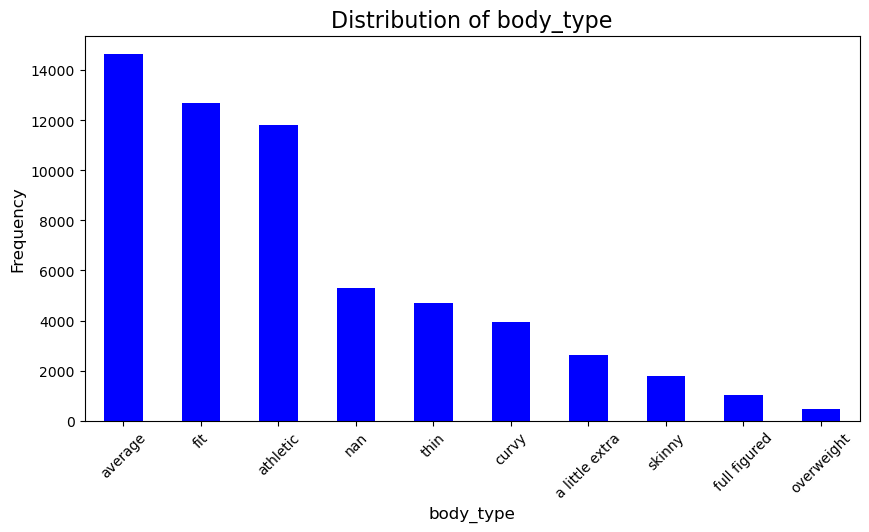

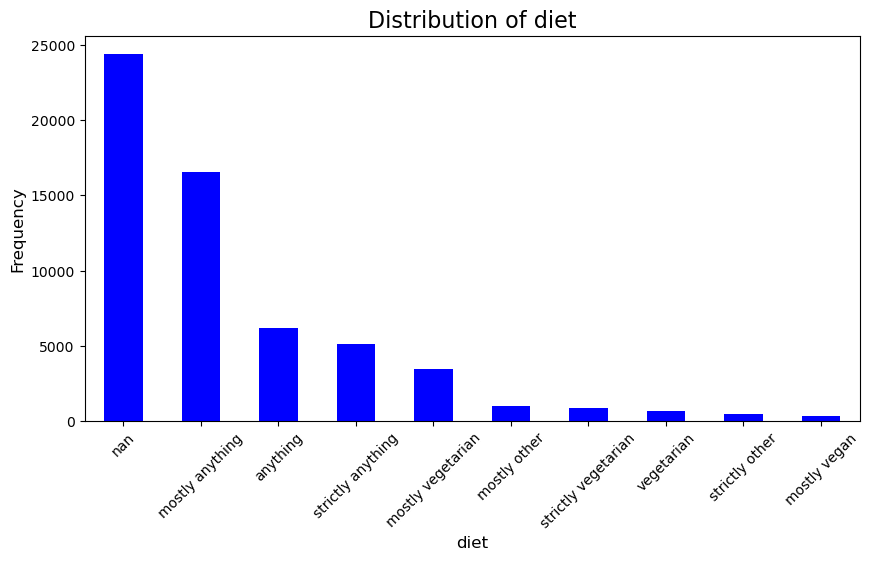

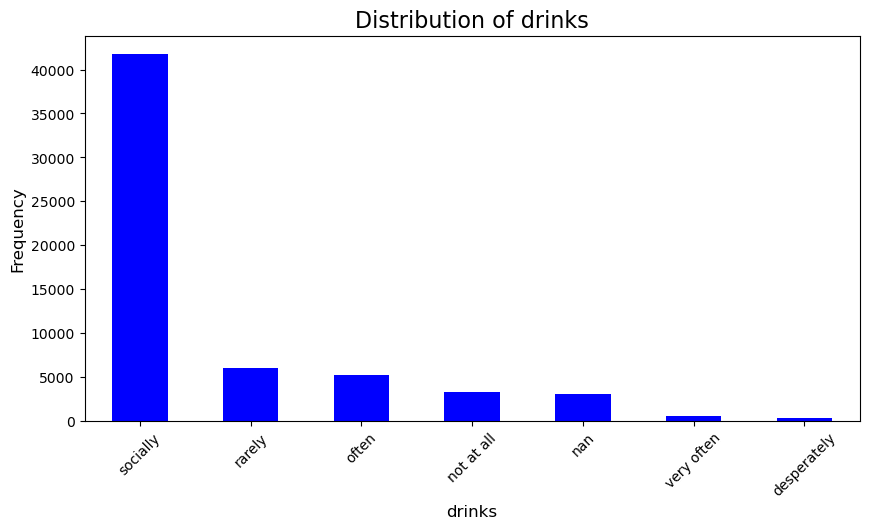

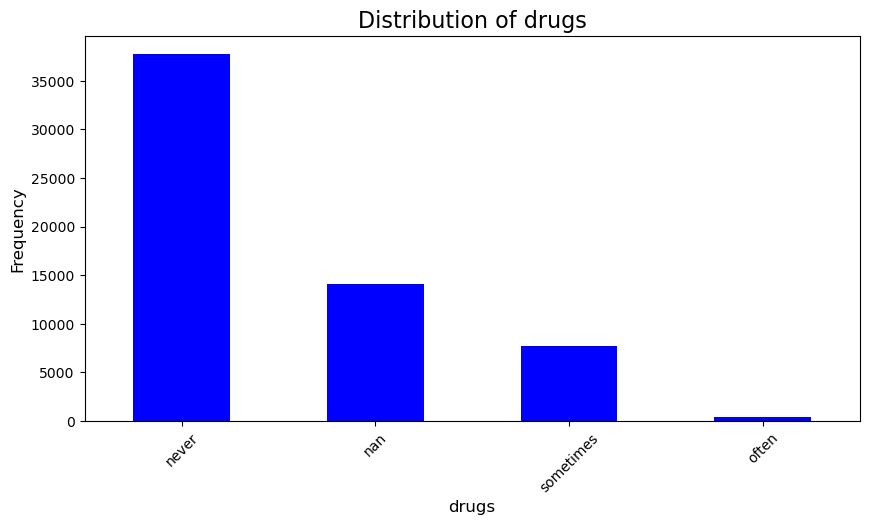

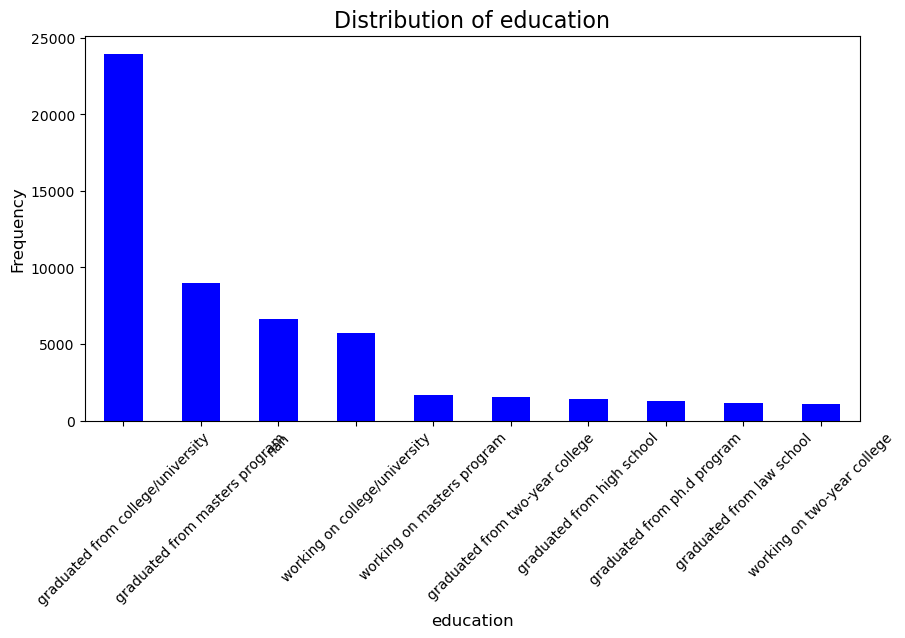

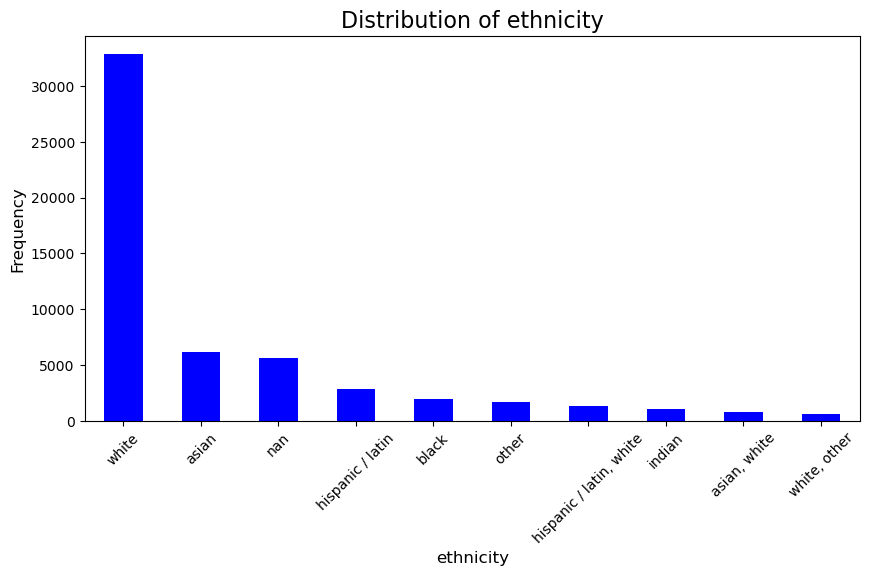

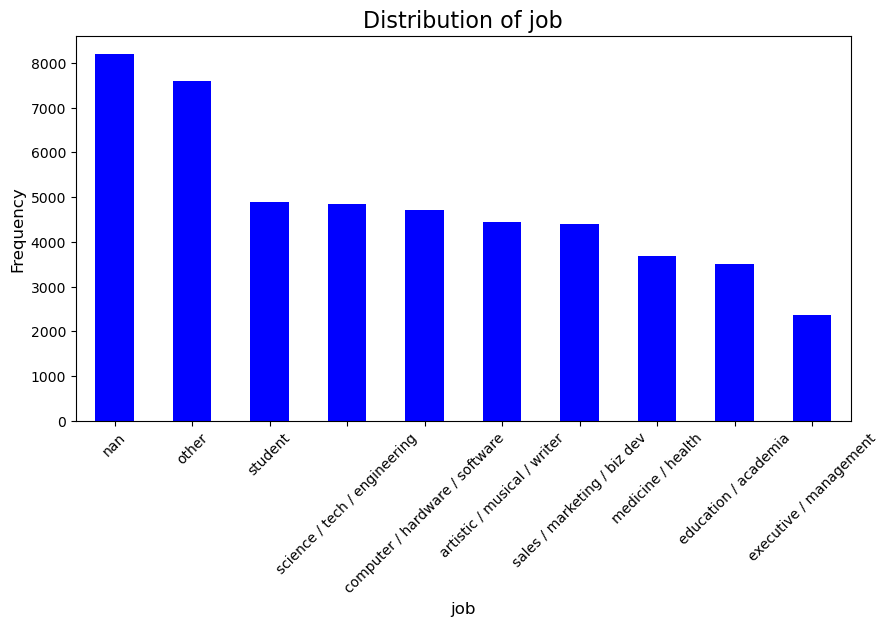

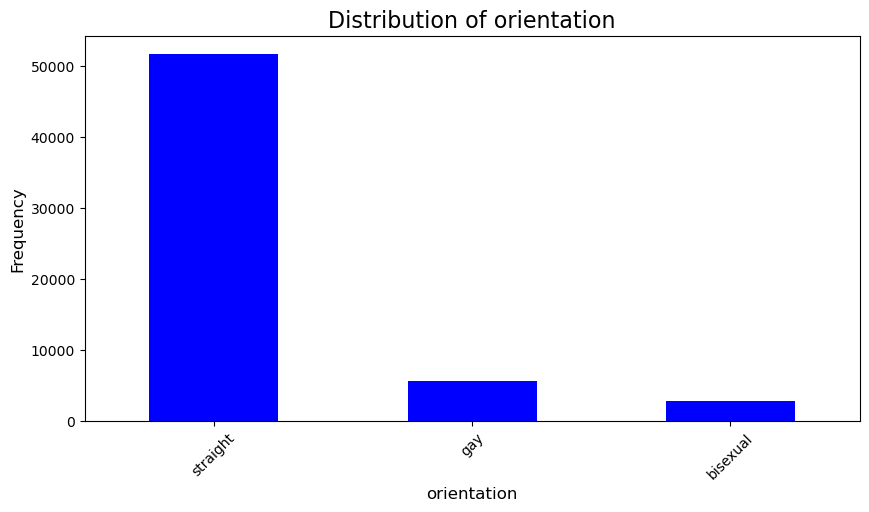

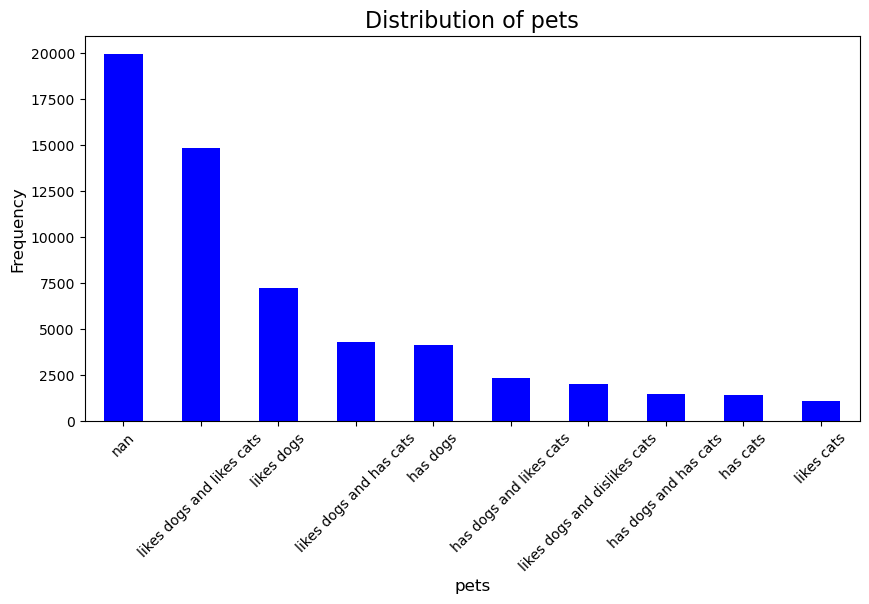

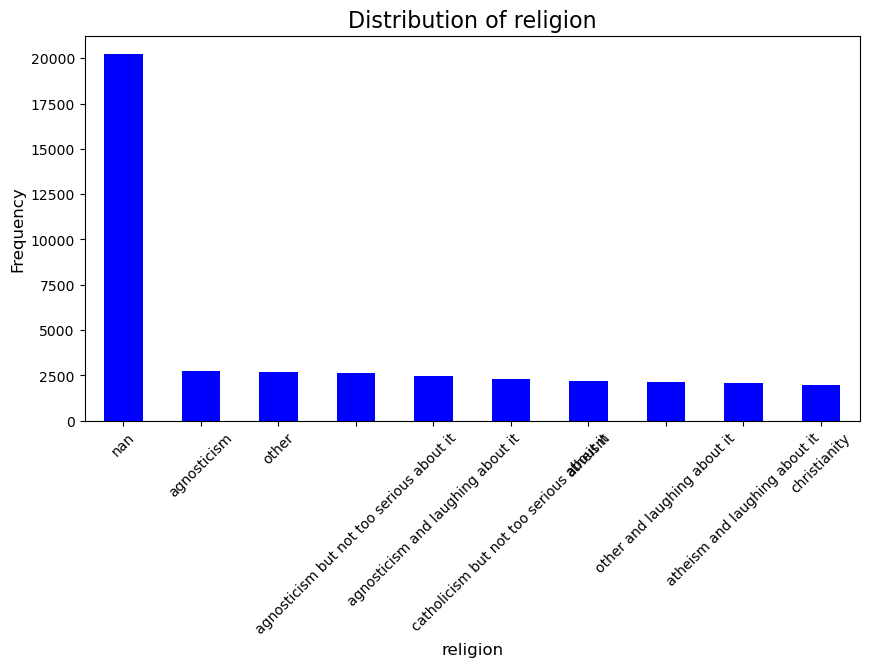

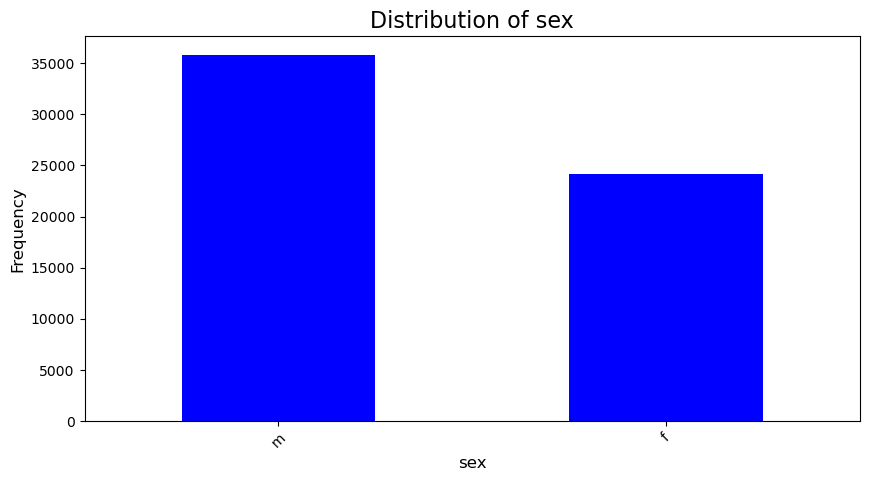

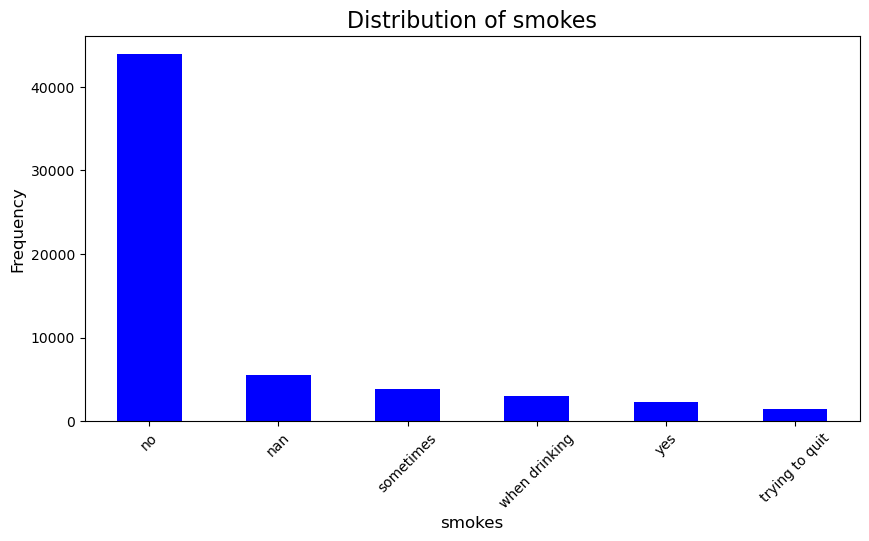

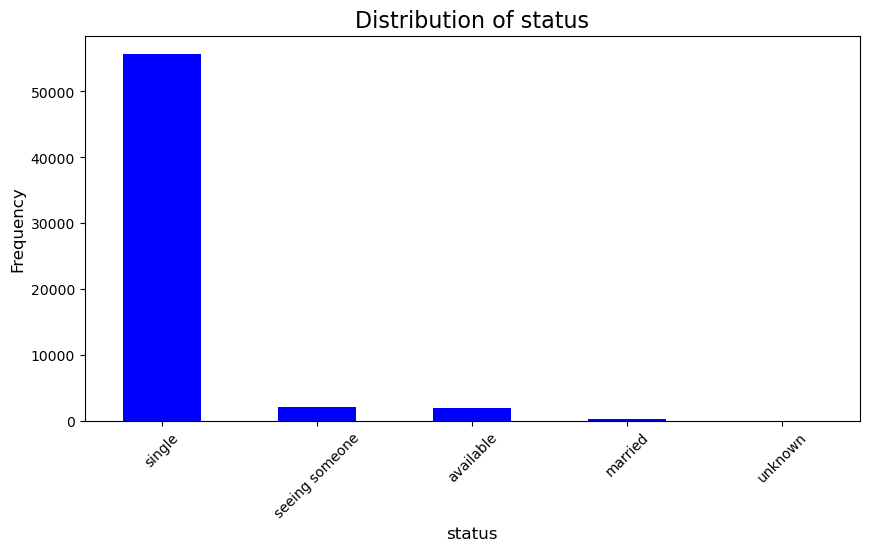

In [13]:
# Univariate Analysis - Categorical Variables
categorical_cols = ['body_type', 'diet', 'drinks', 'drugs', 'education', 
                    'ethnicity', 'job', 'orientation', 'pets', 'religion', 'sex', 'smokes', 'status']

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    data_copy[col].value_counts(dropna=False).head(10).plot(kind='bar', color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


<Figure size 1000x600 with 0 Axes>

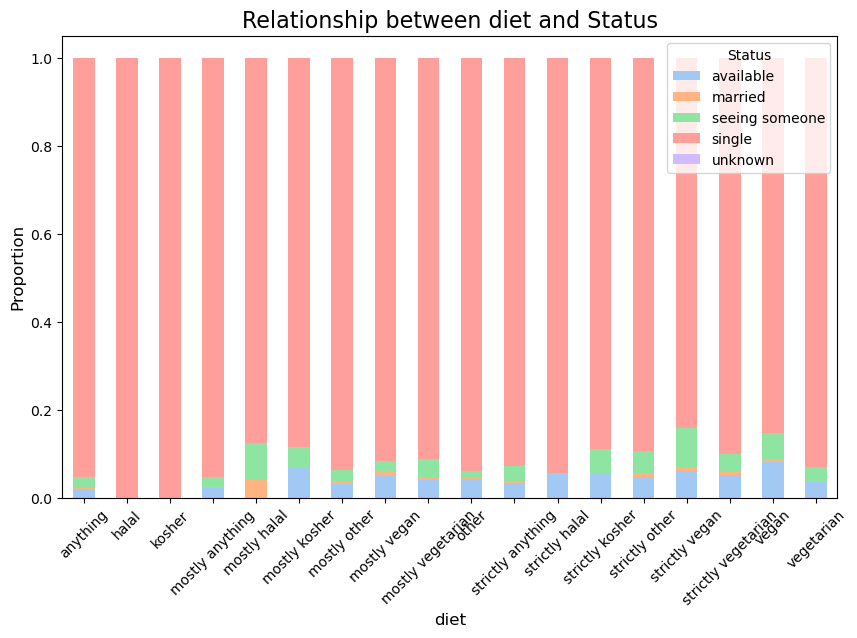

<Figure size 1000x600 with 0 Axes>

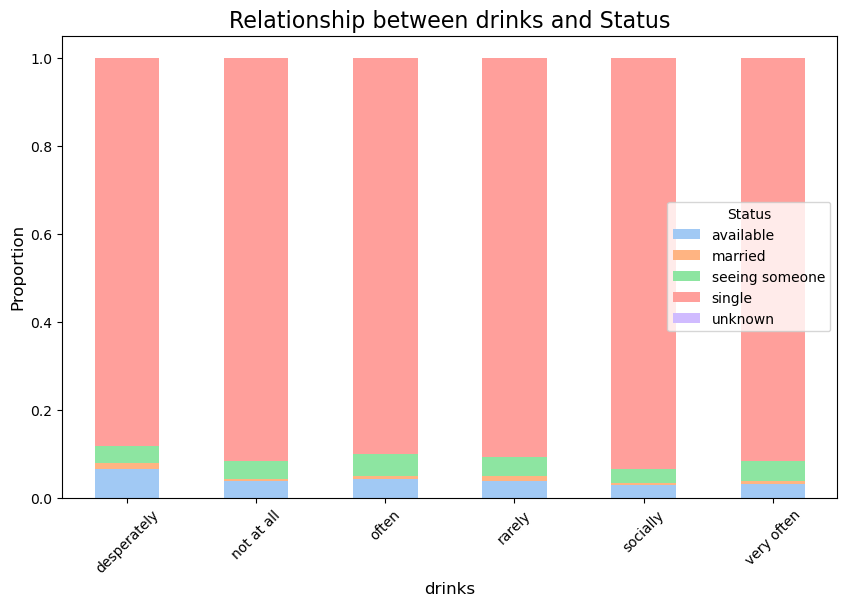

<Figure size 1000x600 with 0 Axes>

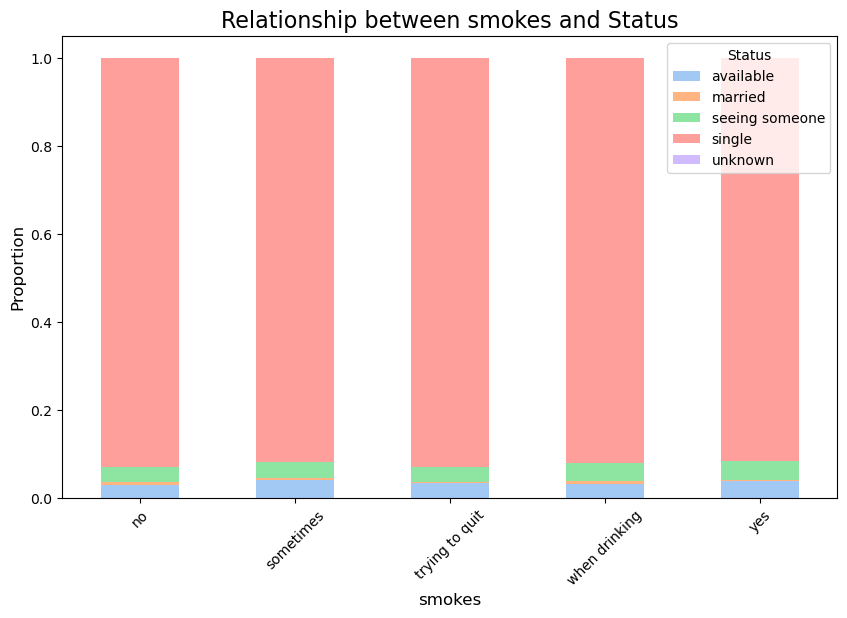

<Figure size 1000x600 with 0 Axes>

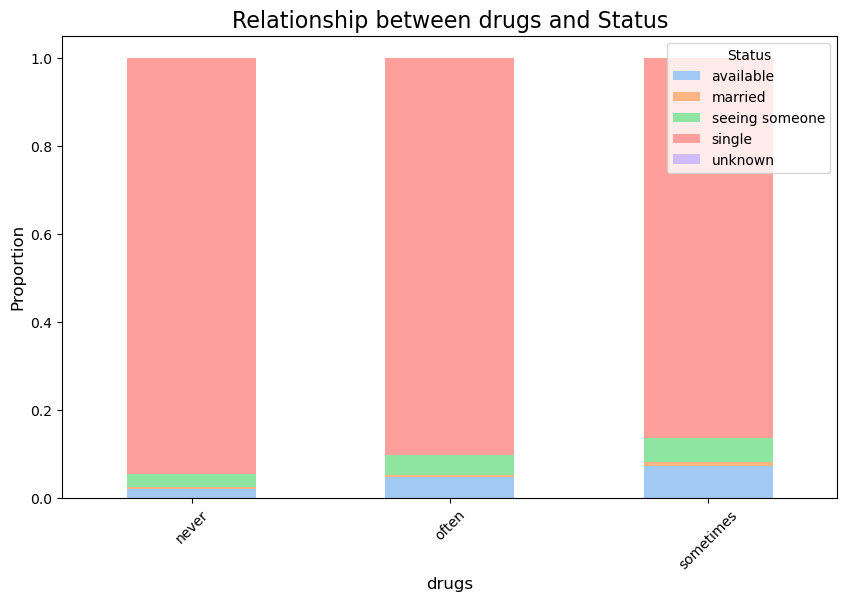

In [28]:
# Bivariate Analysis: Relationship between `status` and key lifestyle attributes
key_attributes = ['diet', 'drinks', 'smokes', 'drugs']

# Plot stacked bar charts for `status` vs lifestyle attributes
for attr in key_attributes:
    plt.figure(figsize=(10, 6))
    status_attr = data_copy.groupby([attr, 'status']).size().unstack()
    status_attr = status_attr.div(status_attr.sum(axis=1), axis=0)  # Normalize to percentages
    status_attr.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))
    plt.title(f'Relationship between {attr} and Status', fontsize=16)
    plt.xlabel(attr, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Status', fontsize=10)
    plt.show()


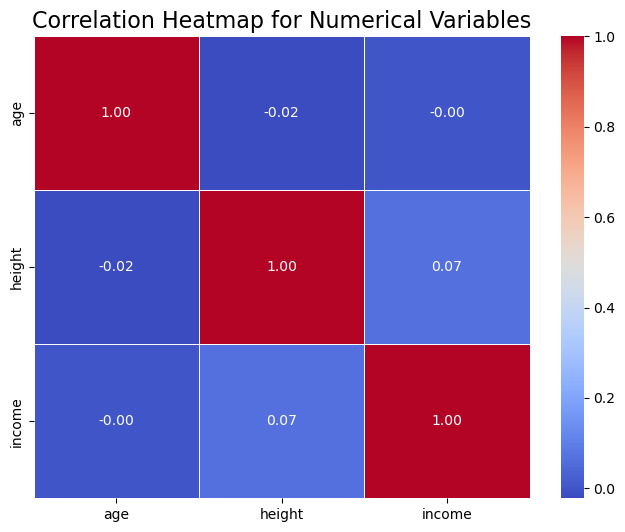

In [30]:
# Correlation Analysis: Numerical Variables
numerical_cols = ['age', 'height', 'income']

plt.figure(figsize=(8, 6))
correlation_matrix = data_copy[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables', fontsize=16)
plt.show()


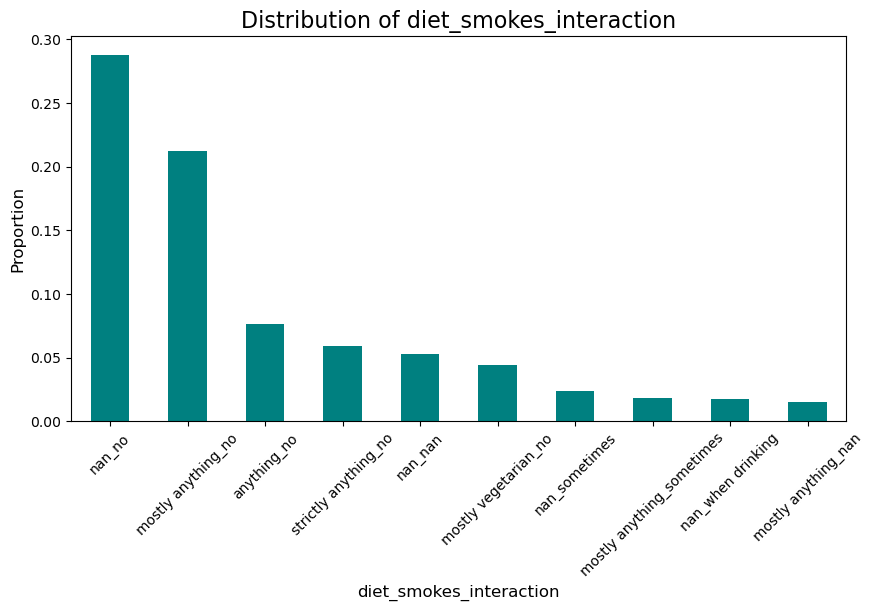

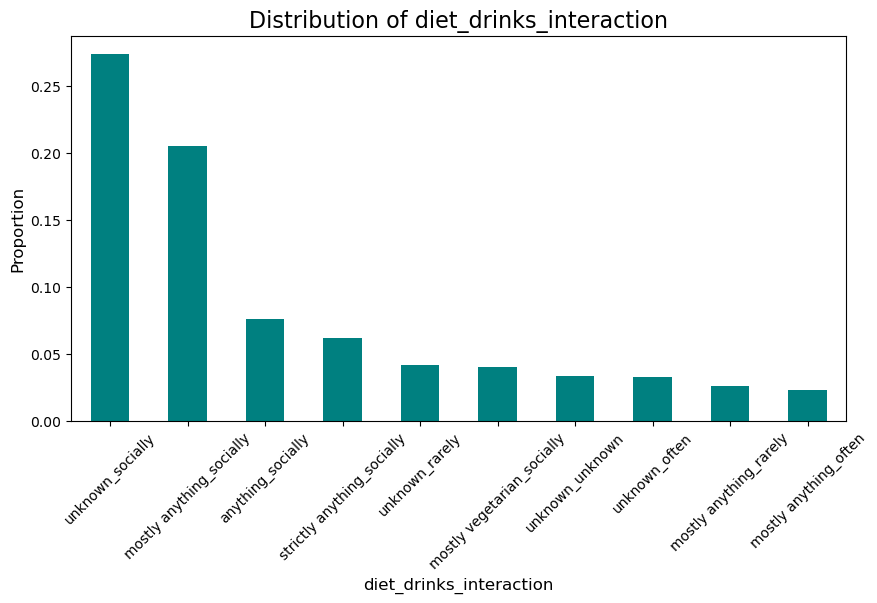

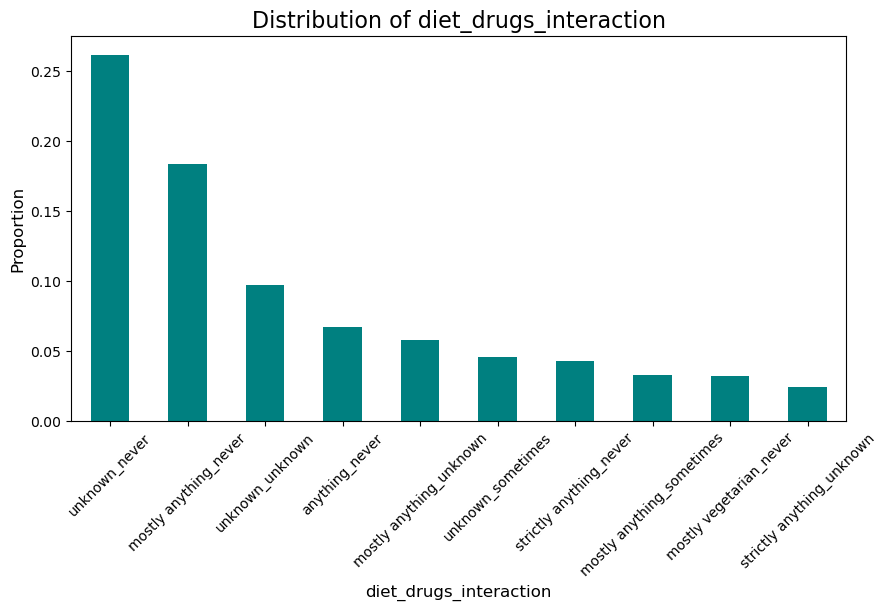

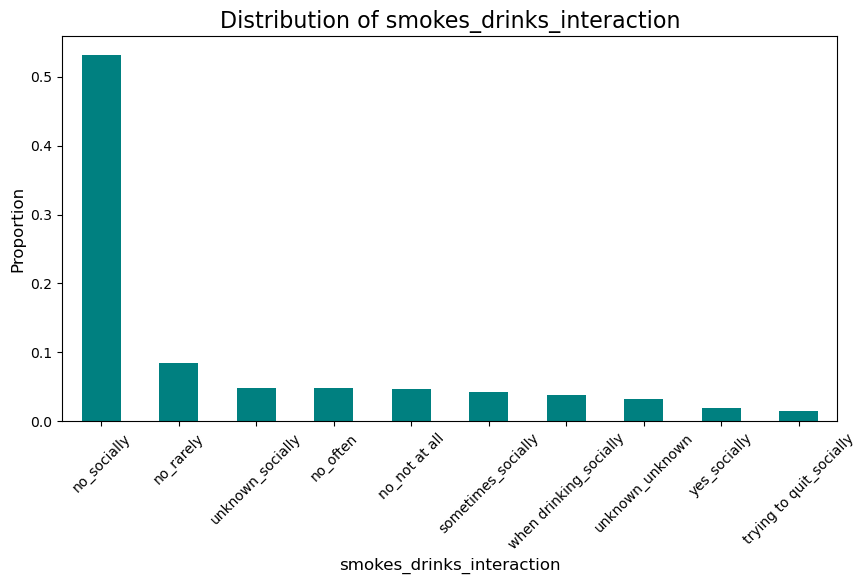

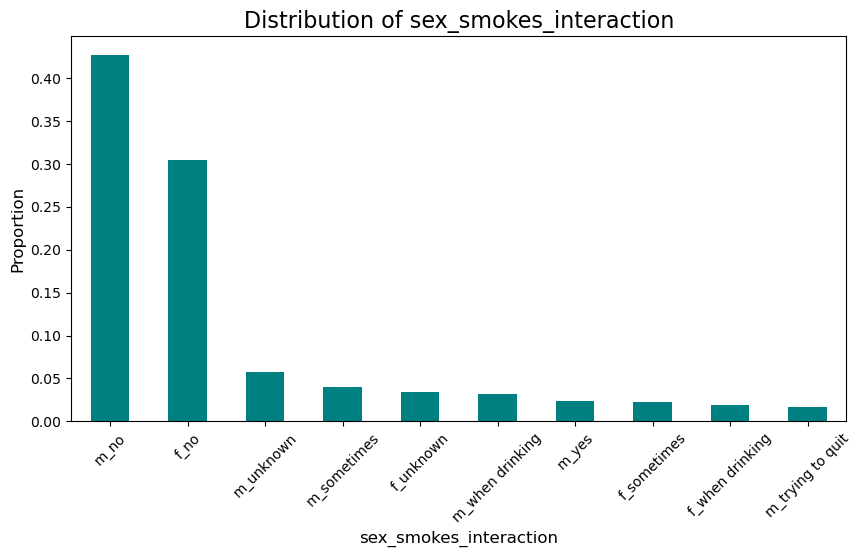

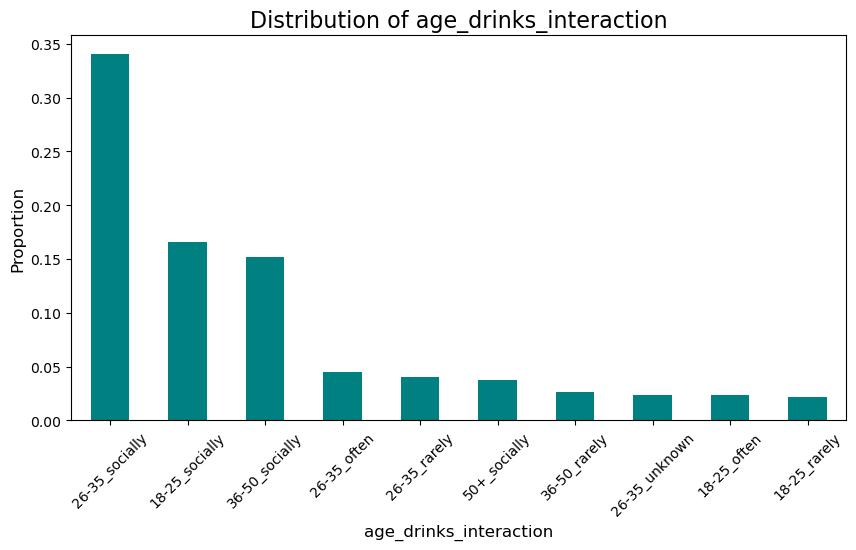

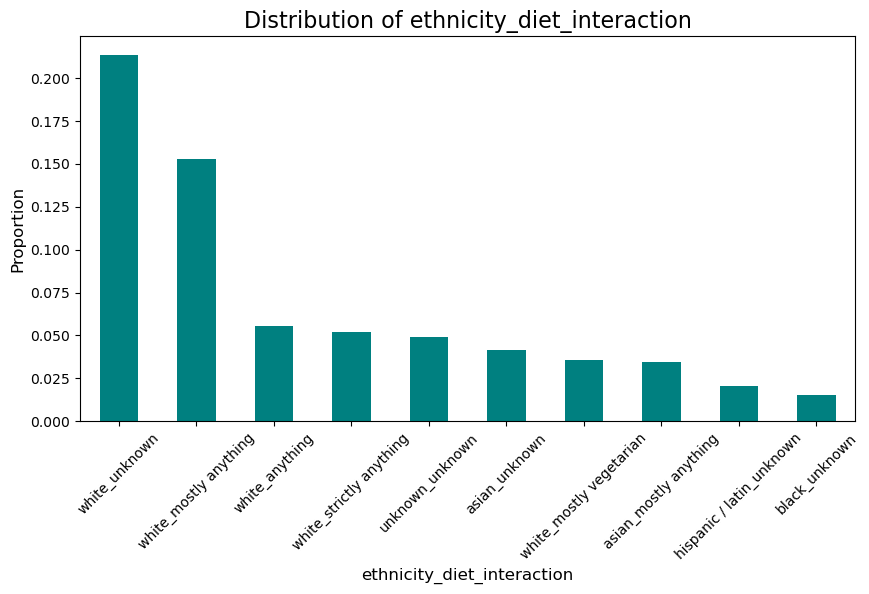

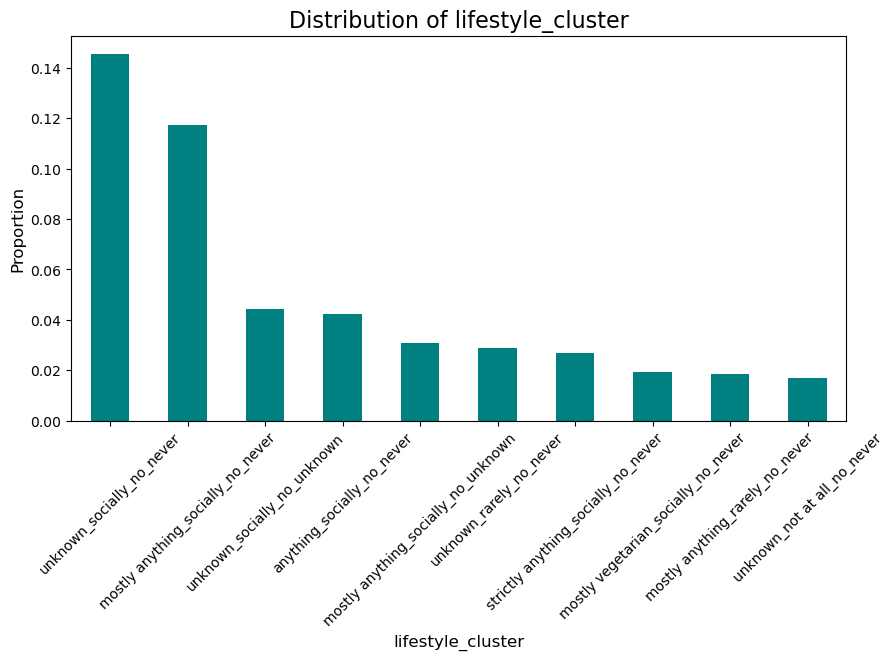

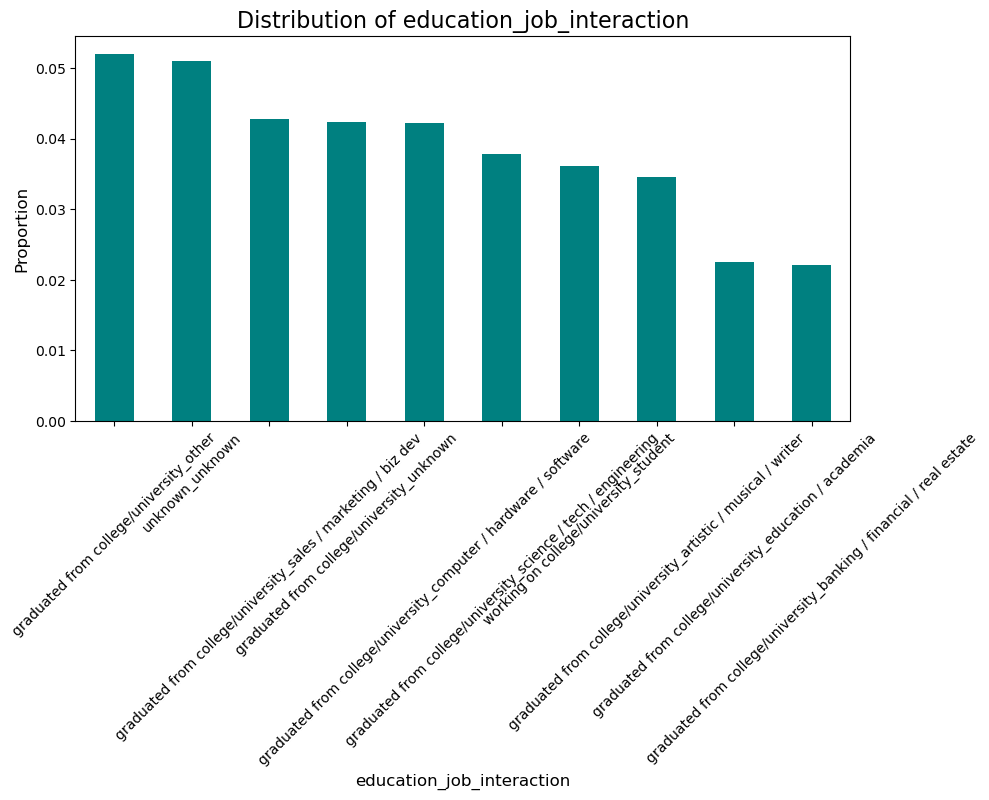

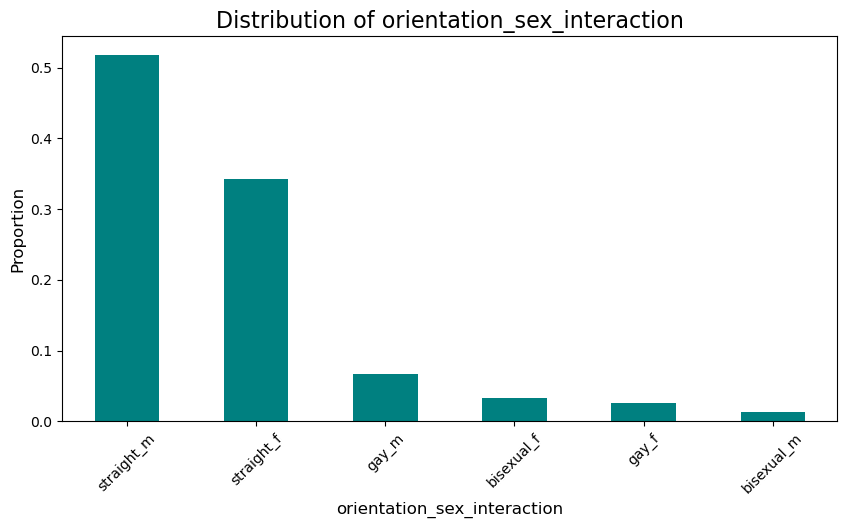

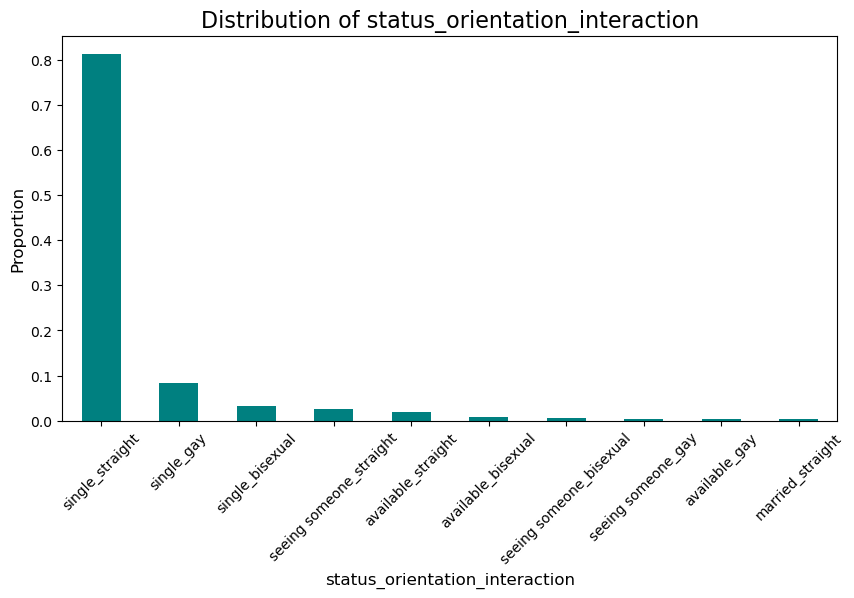

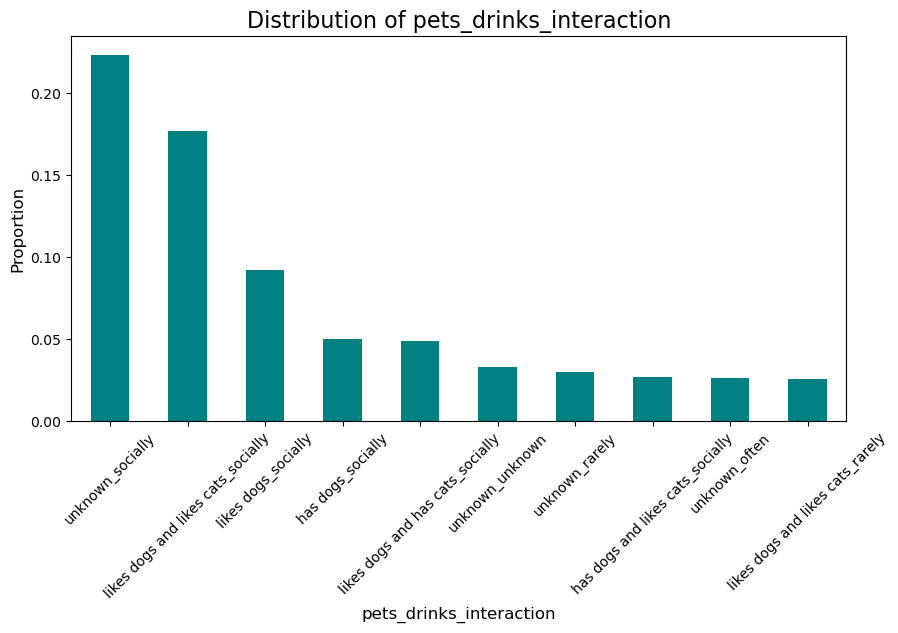

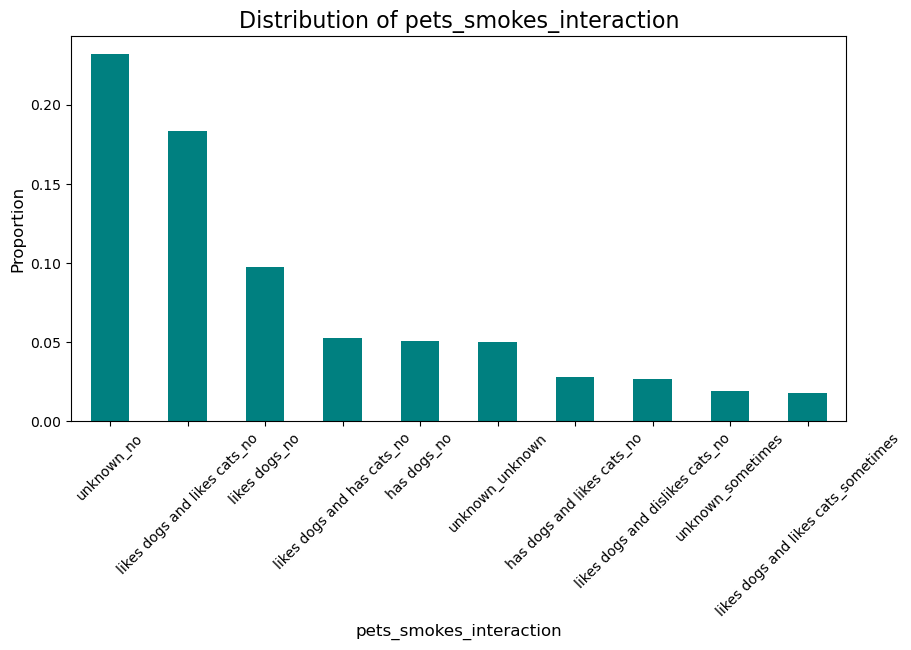

<Figure size 1200x600 with 0 Axes>

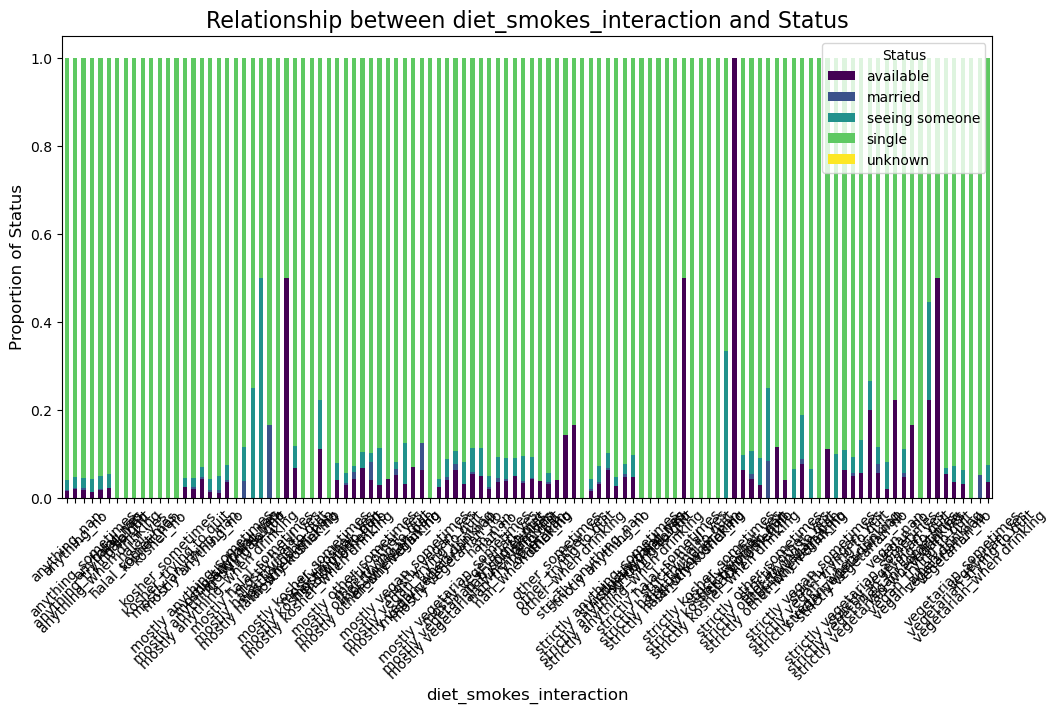

<Figure size 1200x600 with 0 Axes>

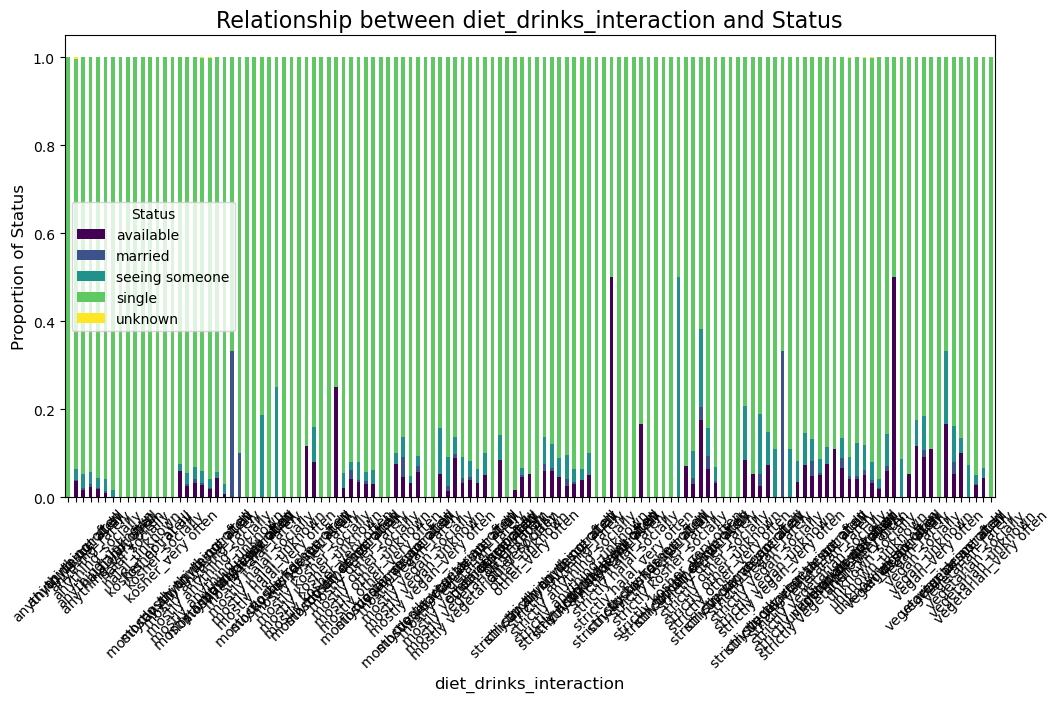

<Figure size 1200x600 with 0 Axes>

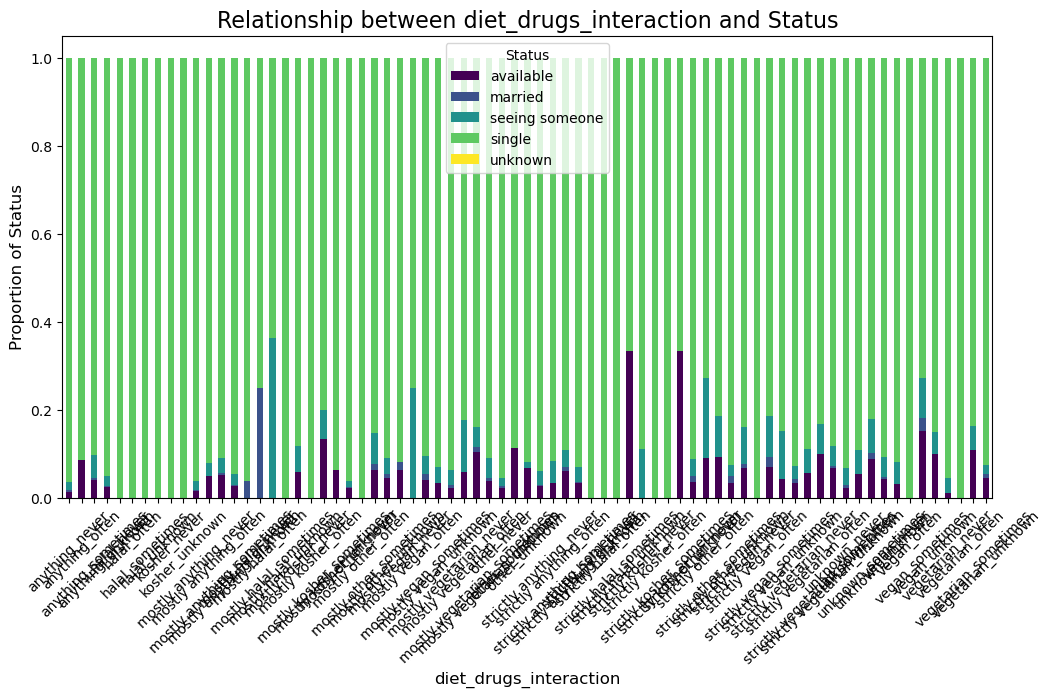

<Figure size 1200x600 with 0 Axes>

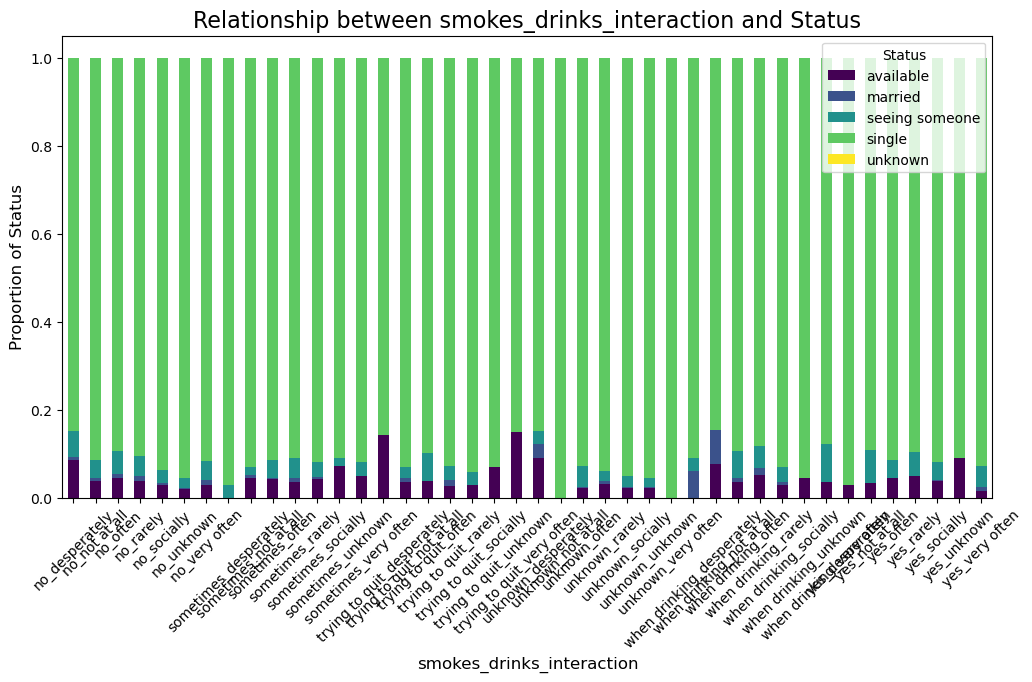

<Figure size 1200x600 with 0 Axes>

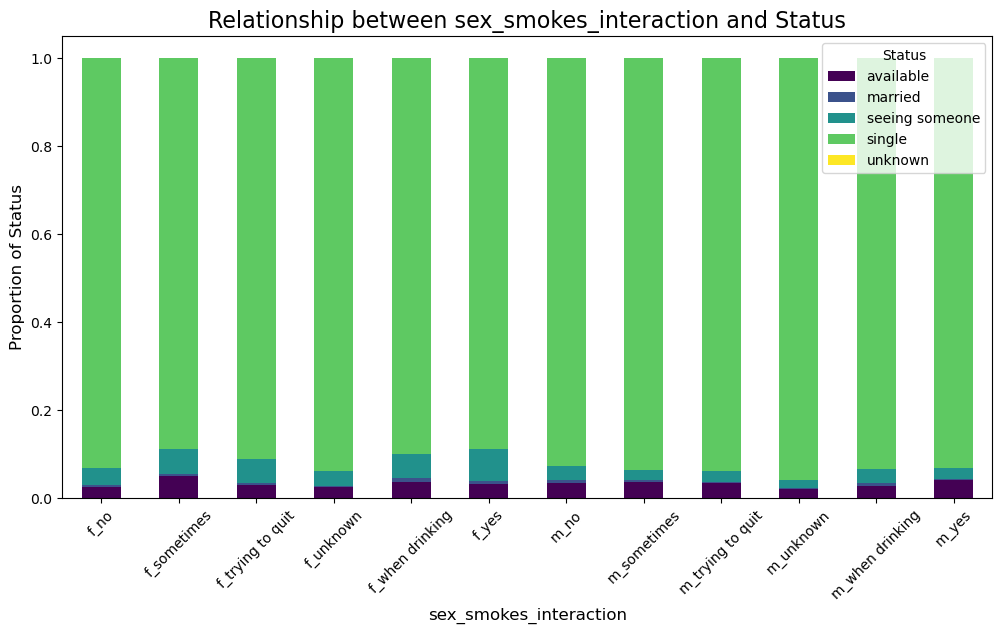

<Figure size 1200x600 with 0 Axes>

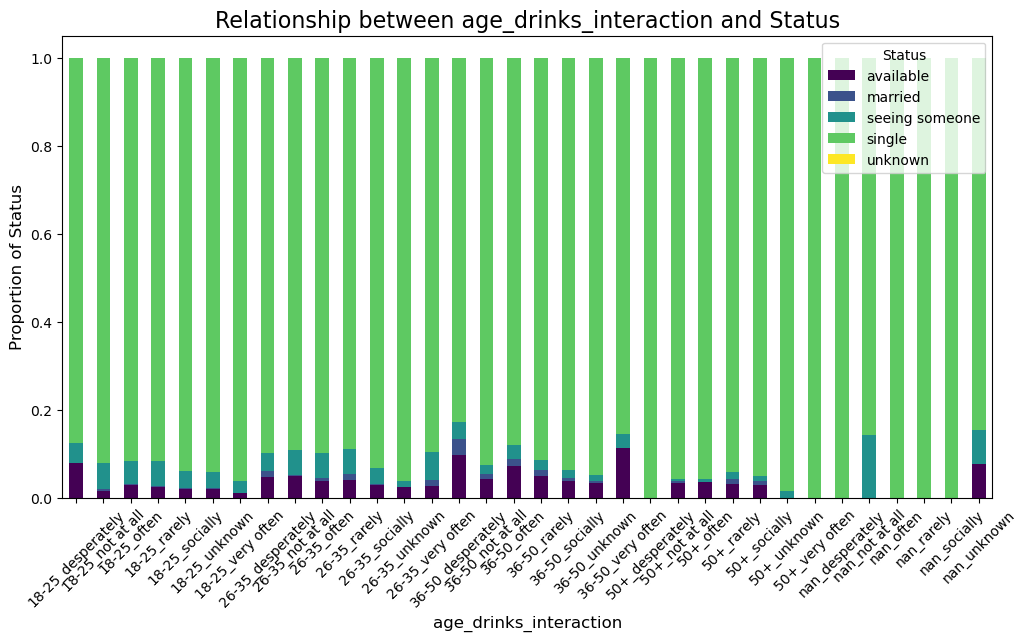

<Figure size 1200x600 with 0 Axes>

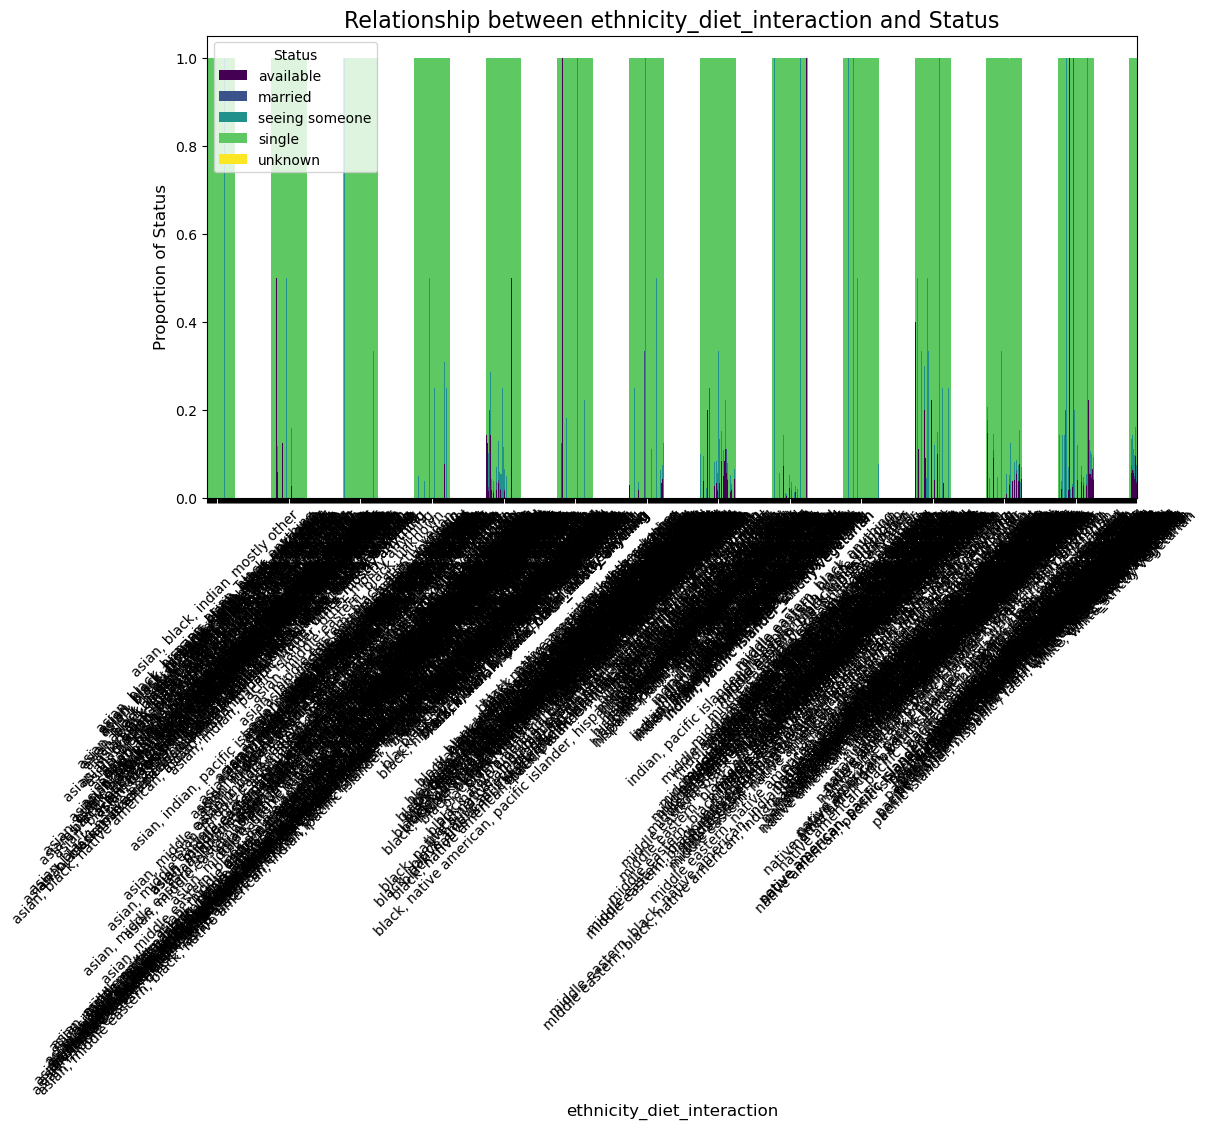

<Figure size 1200x600 with 0 Axes>

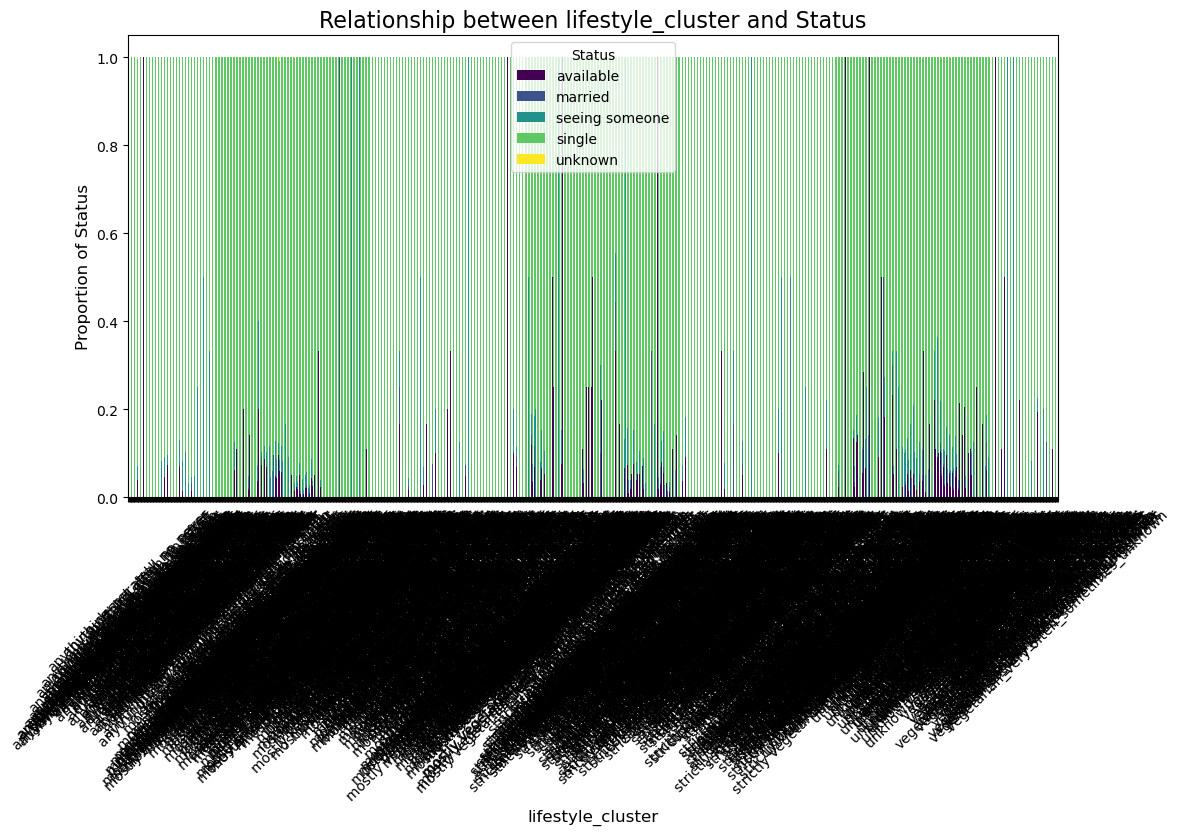

<Figure size 1200x600 with 0 Axes>

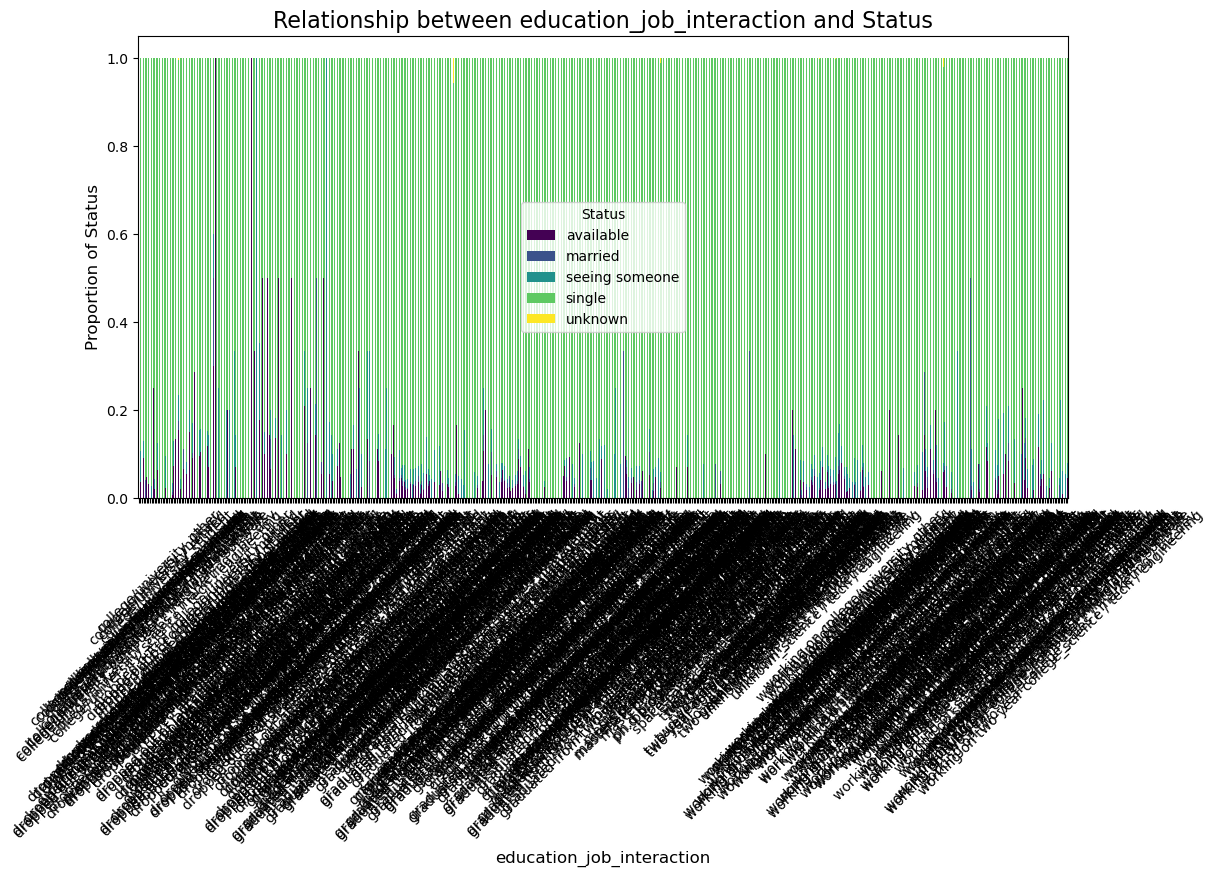

<Figure size 1200x600 with 0 Axes>

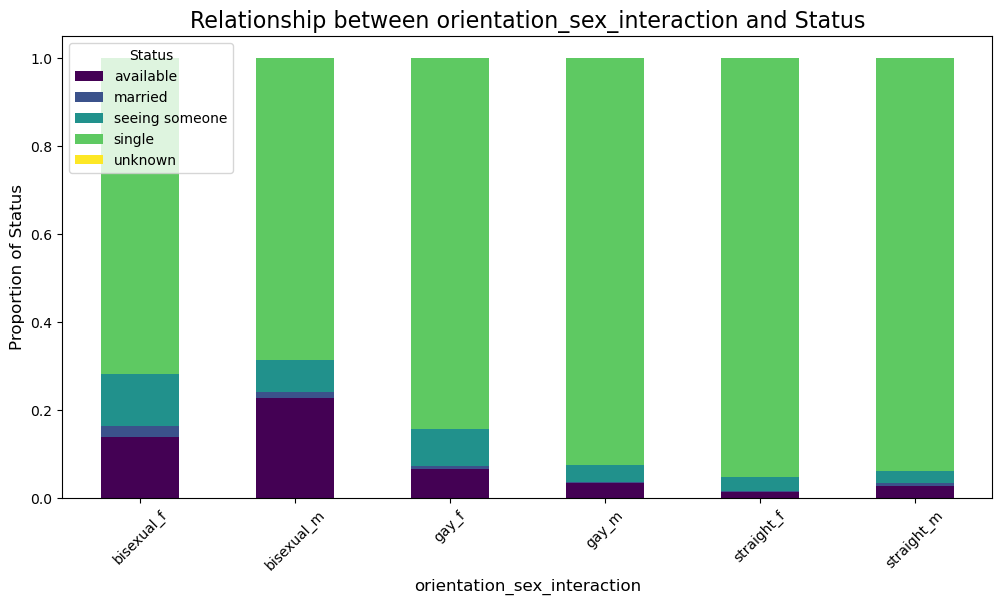

<Figure size 1200x600 with 0 Axes>

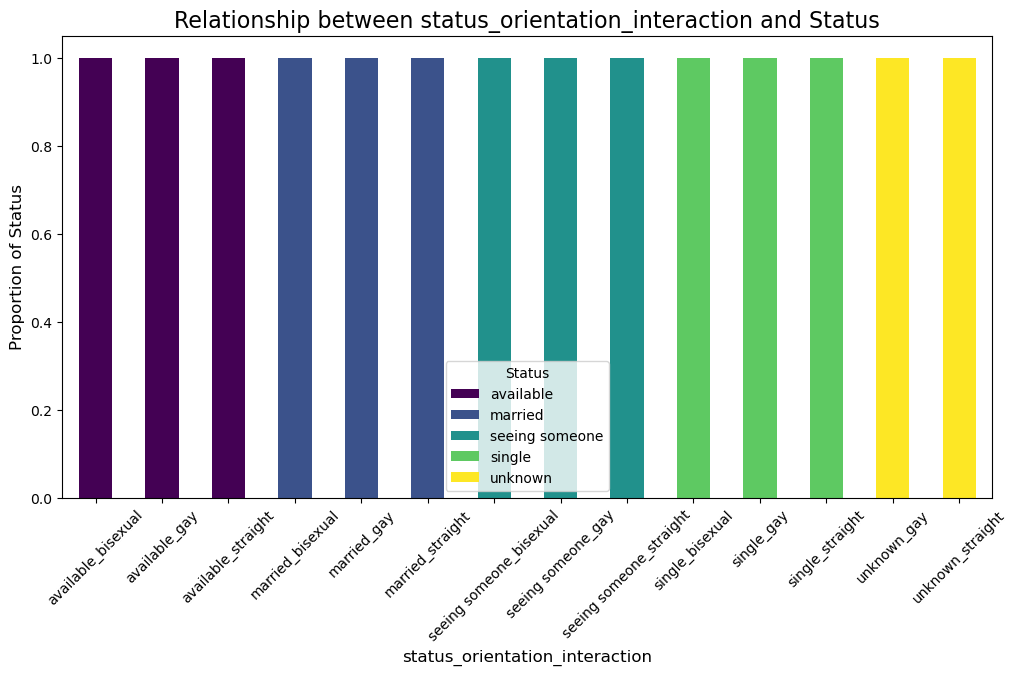

<Figure size 1200x600 with 0 Axes>

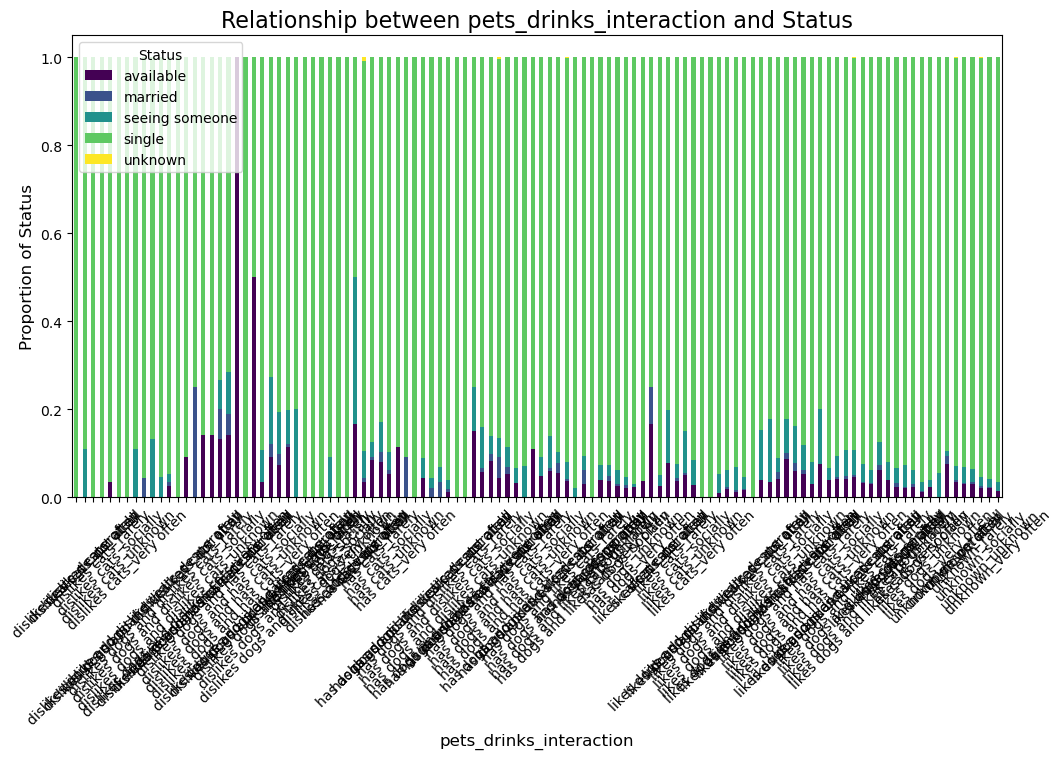

<Figure size 1200x600 with 0 Axes>

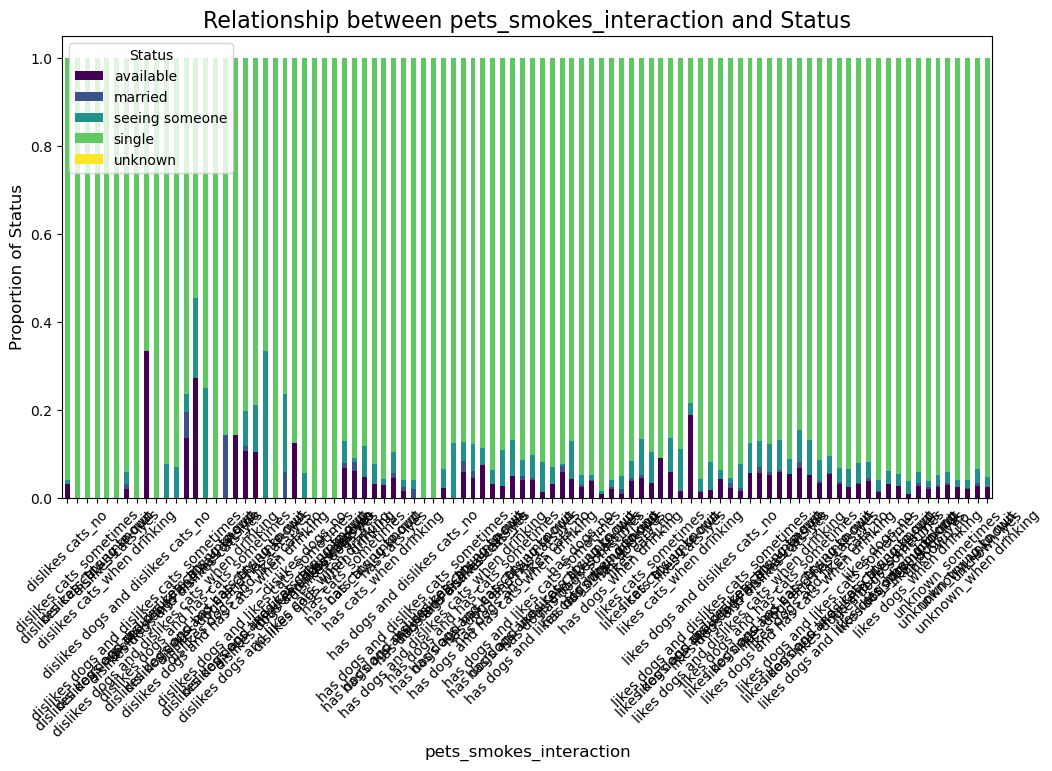

In [41]:
# Looking at Interaction Terms

# Assuming interaction terms are already created and stored in `scaled_data`

# List of interaction terms for analysis
interaction_terms = [
    'diet_smokes_interaction', 'diet_drinks_interaction', 'diet_drugs_interaction',
    'smokes_drinks_interaction', 'sex_smokes_interaction', 'age_drinks_interaction',
    'ethnicity_diet_interaction', 'lifestyle_cluster', 'education_job_interaction',
    'orientation_sex_interaction', 'status_orientation_interaction',
    'pets_drinks_interaction', 'pets_smokes_interaction'
]

# Step 1: Distribution of interaction terms
for term in interaction_terms:
    if term in scaled_data.columns:
        plt.figure(figsize=(10, 5))
        scaled_data[term].value_counts(normalize=True).head(10).plot(kind='bar', color='teal')
        plt.title(f'Distribution of {term}', fontsize=16)
        plt.xlabel(term, fontsize=12)
        plt.ylabel('Proportion', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

# Step 2: Relationship between interaction terms and `status`
for term in interaction_terms:
    if term in scaled_data.columns:
        plt.figure(figsize=(12, 6))
        term_status = scaled_data.groupby([term, 'status']).size().unstack()
        term_status = term_status.div(term_status.sum(axis=1), axis=0)  # Normalize to percentages
        term_status.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
        plt.title(f'Relationship between {term} and Status', fontsize=16)
        plt.xlabel(term, fontsize=12)
        plt.ylabel('Proportion of Status', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Status', fontsize=10)
        plt.show()


In [43]:
# Regression

# Preparing the data for regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the target variable: Binary classification (single or not)
scaled_data['is_single'] = (scaled_data['status'] == 'single').astype(int)

# Selecting relevant features for lifestyle habits
lifestyle_features = ['diet', 'drinks', 'smokes', 'drugs', 'pets', 'body_type', 'education']

# Ensure only valid columns are included and encode categorical variables
X = pd.get_dummies(scaled_data[lifestyle_features], drop_first=True)
y = scaled_data['is_single']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Logistic Regression: {roc_auc_log:.2f}")
print(f"ROC-AUC Random Forest: {roc_auc_rf:.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       878
           1       0.93      1.00      0.96     11112

    accuracy                           0.93     11990
   macro avg       0.46      0.50      0.48     11990
weighted avg       0.86      0.93      0.89     11990

Confusion Matrix:
 [[    0   878]
 [    0 11112]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.10      0.02      0.03       878
           1       0.93      0.99      0.96     11112

    accuracy                           0.92     11990
   macro avg       0.51      0.50      0.49     11990
weighted avg       0.87      0.92      0.89     11990

Confusion Matrix:
 [[   17   861]
 [  149 10963]]

ROC-AUC Logistic Regression: 0.68
ROC-AUC Random Forest: 0.60


In [49]:
# Create a binary target variable `is_single`
okc_data['is_single'] = (okc_data['status'] == 'single').astype(int)

# Select lifestyle and demographic features for prediction
features = ['diet', 'drinks', 'smokes', 'drugs', 'pets', 'body_type', 'education', 'age']

# Handle missing values by filling with 'unknown' for categorical columns and median for numerical
for col in features:
    if okc_data[col].dtype == 'object':
        okc_data[col] = okc_data[col].fillna('unknown')
    else:
        okc_data[col] = okc_data[col].fillna(okc_data[col].median())

# One-hot encode categorical features
X = pd.get_dummies(okc_data[features], drop_first=True)

# Target variable
y = okc_data['is_single']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Compare ROC-AUC scores
roc_auc_log = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Logistic Regression: {roc_auc_log:.2f}")
print(f"ROC-AUC Random Forest: {roc_auc_rf:.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       878
           1       0.93      1.00      0.96     11112

    accuracy                           0.93     11990
   macro avg       0.80      0.50      0.48     11990
weighted avg       0.91      0.93      0.89     11990

Confusion Matrix:
 [[    2   876]
 [    1 11111]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.11      0.03      0.04       878
           1       0.93      0.98      0.96     11112

    accuracy                           0.91     11990
   macro avg       0.52      0.50      0.50     11990
weighted avg       0.87      0.91      0.89     11990

Confusion Matrix:
 [[   22   856]
 [  171 10941]]

ROC-AUC Logistic Regression: 0.69
ROC-AUC Random Forest: 0.64


In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


file_path = 'OKCupid_profiles.csv'
data = pd.read_csv(file_path)


# Focus on lifestyle habits and relationship status
columns_of_interest = ['diet', 'drinks', 'drugs', 'smokes', 'status']
data_subset = data[columns_of_interest]


# Remove rows where any of the selected columns has missing data
data_clean = data_subset.dropna()

# Use LabelEncoder to convert text categories into numeric values
label_encoders = {}
for column in ['diet', 'drinks', 'drugs', 'smokes', 'status']:
    le = LabelEncoder()
    # Fit the encoder and transform the column
    data_clean[column] = le.fit_transform(data_clean[column])
    # Store the encoder for later use
    label_encoders[column] = le


# Identify and exclude the 'unknown' category for relationship status
unknown_class = label_encoders['status'].transform(['unknown'])[0]
data_clean = data_clean[data_clean['status'] != unknown_class]

# Step 6: Split the data into features (X) and target (y)
# X: Input features (lifestyle habits), y: Target variable (relationship status)
X = data_clean[['diet', 'drinks', 'drugs', 'smokes']]
y = data_clean['status']


# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest is a robust ensemble model for classification tasks
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


# Use the trained model to predict the relationship status for the test data
y_pred = rf_model.predict(X_test)


# Compute the overall accuracy and a detailed classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(
    y_test, 
    y_pred, 
    target_names=label_encoders['status'].inverse_transform(np.unique(y))
)

# Step 11: Output the results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


/var/folders/_x/bxt428t56g51tq23n769vbbc0000gn/T/ipykernel_42468/3178712860.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = le.fit_transform(data_clean[column])
/var/folders/_x/bxt428t56g51tq23n769vbbc0000gn/T/ipykernel_42468/3178712860.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = le.fit_transform(data_clean[column])
/var/folders/_x/bxt428t56g51tq23n769vbbc0000gn/T/ipykernel_42468/3178712860.py:28: SettingWithCopyWarning: 
A value is trying to be set on

Model Accuracy: 0.94

Classification Report:
                precision    recall  f1-score   support

     available       0.17      0.01      0.01       141
       married       0.00      0.00      0.00        21
seeing someone       0.20      0.01      0.01       155
        single       0.94      1.00      0.97      4896

      accuracy                           0.94      5213
     macro avg       0.33      0.25      0.25      5213
  weighted avg       0.89      0.94      0.91      5213



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler


irrelevant_columns = [col for col in data.columns if "Unnamed" in col or str(col).isdigit()]
cleaned_data = data.drop(columns=irrelevant_columns)


# Separate categorical and numerical columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
numerical_columns = cleaned_data.select_dtypes(exclude=['object']).columns

# Imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

cleaned_data[categorical_columns] = categorical_imputer.fit_transform(cleaned_data[categorical_columns])
cleaned_data[numerical_columns] = numerical_imputer.fit_transform(cleaned_data[numerical_columns])


high_cardinality_columns = [col for col in categorical_columns if cleaned_data[col].nunique() > 20]

for col in high_cardinality_columns:
    value_counts = cleaned_data[col].value_counts()
    rare_categories = value_counts[value_counts < 10].index
    cleaned_data[col] = cleaned_data[col].replace(rare_categories, "Other")


# Ordinal encoding for high-cardinality columns
ordinal_encoder = OrdinalEncoder()
cleaned_data[high_cardinality_columns] = ordinal_encoder.fit_transform(cleaned_data[high_cardinality_columns])

# One-hot encoding for other categorical variables
manageable_columns = [col for col in categorical_columns if col not in high_cardinality_columns]
encoded_data = pd.get_dummies(cleaned_data[manageable_columns], drop_first=True)

# Combine encoded and numerical data
processed_data = pd.concat([cleaned_data[numerical_columns], encoded_data], axis=1)


scaler = MinMaxScaler()
processed_data[numerical_columns] = scaler.fit_transform(processed_data[numerical_columns])


# Display the first few rows of the prepared data
processed_data.head()


age    height    income  body_type_athletic  body_type_average  \
0  0.053191  0.787234  0.000000               False              False   
1  0.202128  0.734043  0.080001               False               True   
2  0.212766  0.712766  0.000000               False              False   
3  0.053191  0.744681  0.020001               False              False   
4  0.138298  0.691489  0.000000                True              False   

   body_type_curvy  body_type_fit  body_type_full figured  body_type_jacked  \
0            False          False                   False             False   
1            False          False                   False             False   
2            False          False                   False             False   
3            False          False                   False             False   
4            False          False                   False             False   

   body_type_overweight  ...  pets_likes dogs and likes cats  sex_m  \
0                 False  ...                            True   True   
1                 False  ...                            True   True   
2                 False  ...                           False   True   
3                 False  ...                           False   True   
4                 False  ...                            True   True   

   smokes_sometimes  smokes_trying to quit  smokes_when drinking  smokes_yes  \
0              True                  False                 False       False   
1             False                  False                 False       False   
2             False                  False                 False       False   
3             False                  False                 False       False   
4             False                  False                 False       False   

   status_married  status_seeing someone  status_single  status_unknown  
0           False                  False           True           False  
1           False                  False           True           False  
2           False                  False          False           False  
3           False                  False           True           False  
4           False                  False           True           False  

[5 rows x 77 columns]